# 04. Comprehensive HBM Patent Data EDA
## HBM 관련 특허 데이터 종합 탐색적 분석

이 노트북은 `data/raw/HBM` 디렉토리 내의 다양한 특허 분석 데이터를 로드하고 시각화합니다.
뉴스 데이터가 '시장 담론'을 보여준다면, 이 특허 데이터는 **'기술적 실체'와 'R&D 경쟁 구도'**를 명확히 보여줍니다.

**분석 대상 파일 및 내용:**
1. **Applicant:** 출원인별 특허 수 (기술 점유율)
2. **Inventor:** 핵심 발명자 랭킹 (Key Talent)
3. **Metric Impact:** 기술 영향력 지표 (Citations 등 - 질적 평가)
4. **Code:** IPC/CPC 기술 분류 코드 (기술 세부 분야)
5. **Abstract:** 특허 초록 텍스트 마이닝 (핵심 키워드)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
import glob

# 시각화 설정
sns.set(style="whitegrid")
font_name = "NanumGothic"
plt.rcParams["font.family"] = font_name
plt.rcParams["axes.unicode_minus"] = False

# 데이터 경로
DATA_DIR = "../data/raw/HBM"
print(f"Data Directory: {DATA_DIR}")

# 파일 목록 확인
files = glob.glob(os.path.join(DATA_DIR, "*.csv"))
print("Found Files:")
for f in files:
    print(f" - {os.path.basename(f)}")

# ------------------------------------------
# 안전한 CSV 로드 함수 (인코딩 에러 방지)
# ------------------------------------------
def load_csv_safe(filepath):
    encodings = ['utf-8', 'cp949', 'euc-kr', 'latin1']
    for enc in encodings:
        try:
            df = pd.read_csv(filepath, encoding=enc)
            print(f"Successfully loaded {os.path.basename(filepath)} with encoding='{enc}'")
            return df
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"Error reading {filepath}: {e}")
            return None
    print(f"Failed to load {filepath} with tested encodings.")
    return None

Data Directory: ../data/raw/HBM
Found Files:
 - HBM_Gemini.csv
 - HBM_Gemini_With_NO Abstract.csv
 - HBM_Gemini_Applicant.csv
 - HBM_Gemini_Code.csv
 - HBM_Gemini_Metric_Impact.csv
 - HBM_Gemini_Export_Pub_Numbers.csv
 - HBM_Gemini_With_Abstract.csv
 - HBM_Gemini_Inventor_Rank.csv


--- 
### 1. Top Applicants Analysis (출원인 랭킹)
어떤 기업이 HBM 기술을 주도하고 있는지 파악합니다.

Successfully loaded HBM_Gemini_Applicant.csv with encoding='utf-8'


/tmp/ipykernel_17475/219060710.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15, x='patent_count', y='applicant_name', palette='viridis')


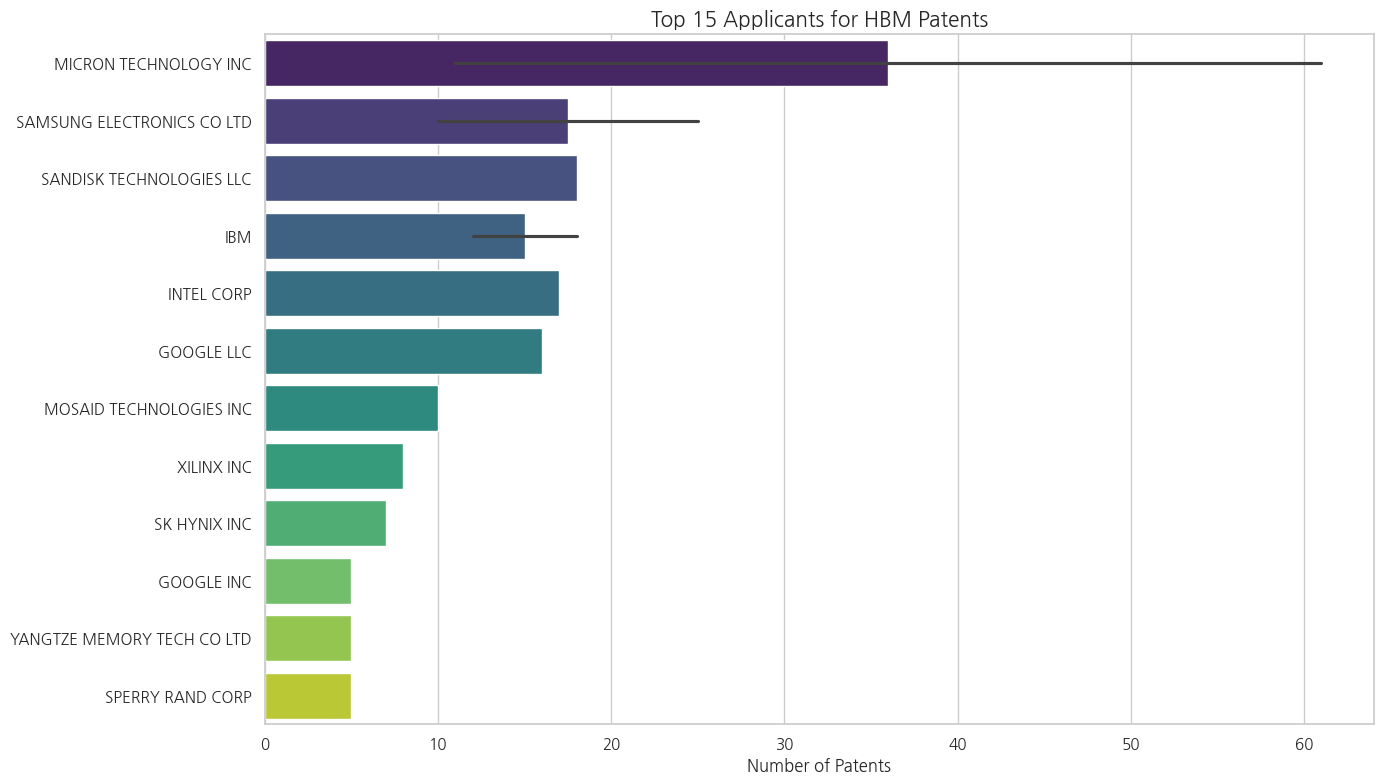

In [6]:
app_df = load_csv_safe(os.path.join(DATA_DIR, "HBM_Gemini_Applicant.csv"))

if app_df is not None:
    # 상위 15개 기업 시각화
    top_15 = app_df.head(15)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(data=top_15, x='patent_count', y='applicant_name', palette='viridis')
    plt.title("Top 15 Applicants for HBM Patents", fontsize=15)
    plt.xlabel("Number of Patents")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

--- 
### 2. Key Inventor Analysis (핵심 발명자)
어떤 연구자가 핵심적인 기여를 했는지 분석합니다. 특정 기업에 핵심 인재가 쏠려 있는지 확인할 수 있습니다.

Successfully loaded HBM_Gemini_Inventor_Rank.csv with encoding='utf-8'


/tmp/ipykernel_17475/1063637247.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_inv, x='patent_count', y='inventor_name', palette='magma')


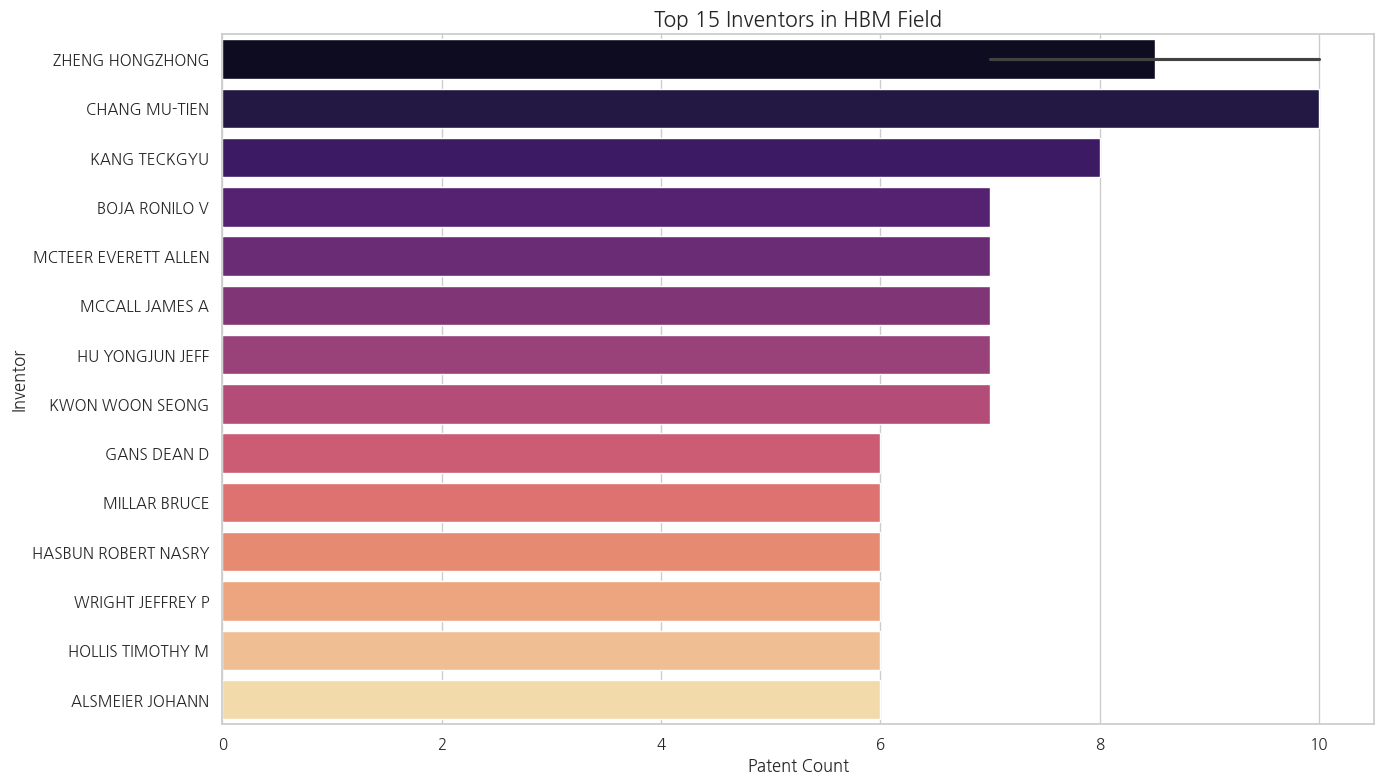

In [7]:
inv_df = load_csv_safe(os.path.join(DATA_DIR, "HBM_Gemini_Inventor_Rank.csv"))

if inv_df is not None:
    top_inv = inv_df.head(15)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(data=top_inv, x='patent_count', y='inventor_name', palette='magma')
    plt.title("Top 15 Inventors in HBM Field", fontsize=15)
    plt.xlabel("Patent Count")
    plt.ylabel("Inventor")
    plt.tight_layout()
    plt.show()

--- 
### 3. Tech Classification (IPC/CPC Code Analysis)
특허 분류 코드를 통해 HBM 기술이 구체적으로 어떤 세부 기술(메모리 소자 vs 패키징 vs 회로 등)에 집중되어 있는지 파악합니다.

Successfully loaded HBM_Gemini_Code.csv with encoding='cp949'
Columns: ['-- ============================================']


/tmp/ipykernel_17475/1274402100.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_codes.values, y=top_codes.index, palette='Blues_r')


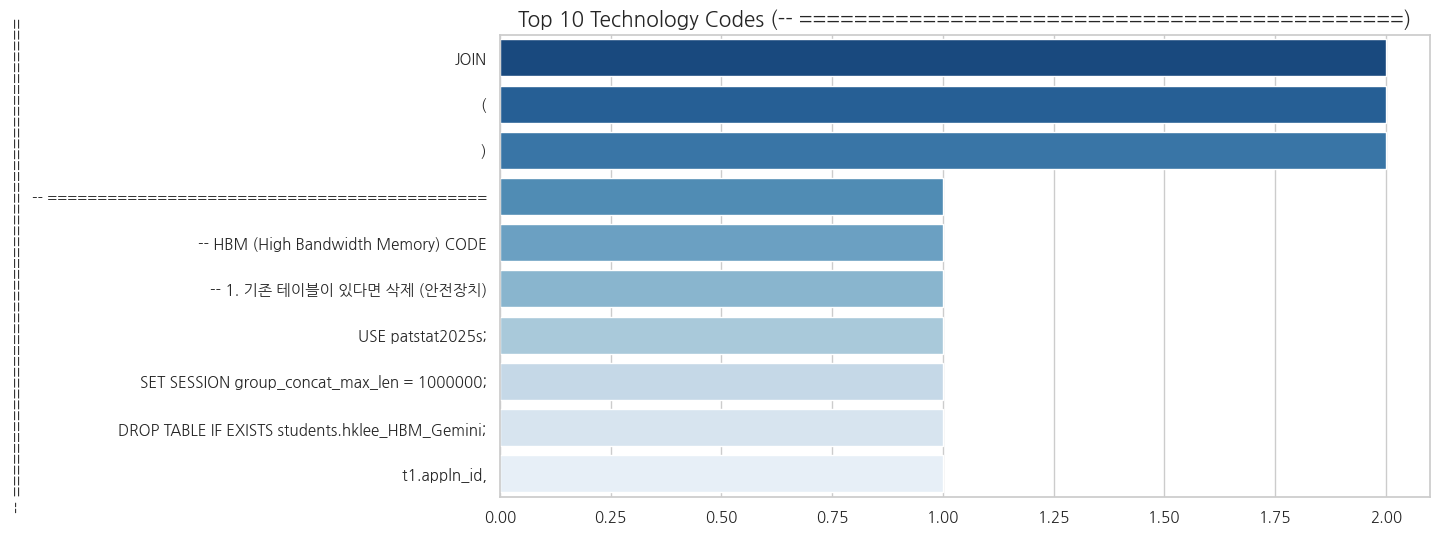

In [8]:
code_df = load_csv_safe(os.path.join(DATA_DIR, "HBM_Gemini_Code.csv"))

if code_df is not None:
    # 데이터 구조 확인 (컬럼명)
    print("Columns:", code_df.columns.tolist())
    
    # 'code'나 'ipc', 'cpc' 등의 컬럼을 찾아 빈도수 시각화
    # (CSV 구조에 따라 수정 필요 가능성 있음, 여기선 첫 번째 컬럼을 코드로 가정)
    target_col = code_df.columns[0] # 가령 'Code' or 'IPC'
    count_col = code_df.columns[1] if len(code_df.columns) > 1 else None
    
    if count_col:
        top_codes = code_df.sort_values(count_col, ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(data=top_codes, x=count_col, y=target_col, palette='Blues_r')
        plt.title(f"Top 10 Technology Codes ({target_col})", fontsize=15)
        plt.show()
    else:
        # 카운트 컬럼이 없으면 직접 카운트
        top_codes = code_df[target_col].value_counts().head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=top_codes.values, y=top_codes.index, palette='Blues_r')
        plt.title(f"Top 10 Technology Codes ({target_col})", fontsize=15)
        plt.show()

--- 
### 4. Technology Impact (질적 평가)
단순 특허 수가 아닌, 기술적 영향력(Metric)을 살펴봅니다. (예: 인용 수, 패밀리 국가 수 등)

Successfully loaded HBM_Gemini_Metric_Impact.csv with encoding='utf-8'
            applicant_name  total_patents  total_citations  \
0               GOOGLE INC              6             4512   
1  MOSAID TECHNOLOGIES INC             10             3045   
2           BURROUGHS CORP              5              816   

   Avg_Citation_Impact  Zero_Citiation_Rate  
0               128.91                 20.0  
1               121.80                  0.0  
2                81.60                  0.0  


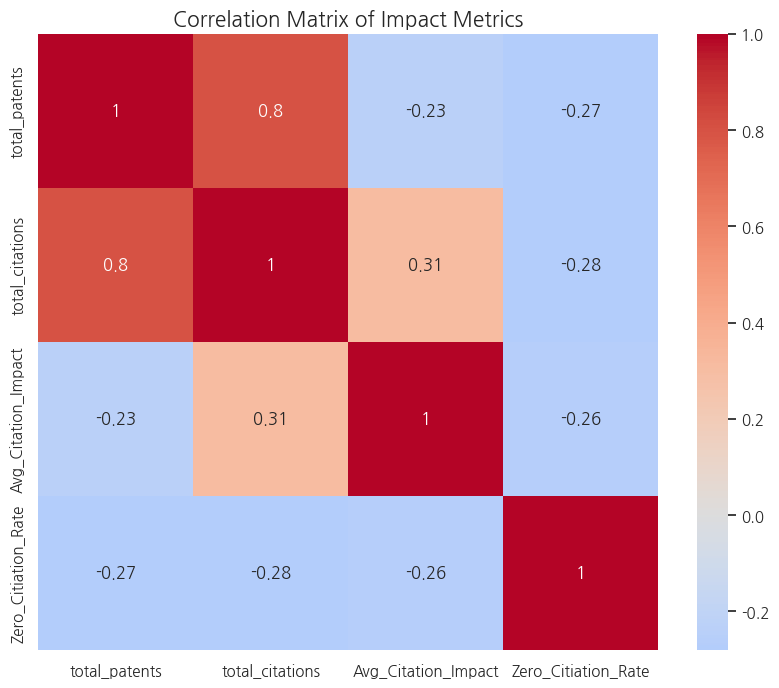

In [9]:
metric_df = load_csv_safe(os.path.join(DATA_DIR, "HBM_Gemini_Metric_Impact.csv"))

if metric_df is not None:
    print(metric_df.head(3))
    
    numeric_cols = metric_df.select_dtypes(include=['float64', 'int64']).columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(metric_df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
        plt.title("Correlation Matrix of Impact Metrics", fontsize=15)
        plt.show()

--- 
### 5. Abstract Keyword Analysis (텍스트 마이닝)
특허 초록에서 빈출되는 기술 용어를 시각화합니다.

Successfully loaded HBM_Gemini_With_Abstract.csv with encoding='utf-8'


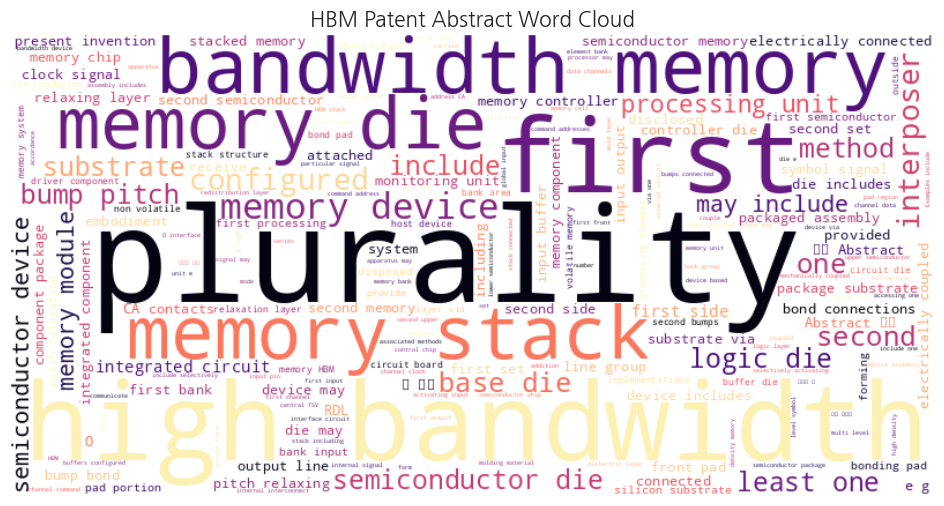

In [10]:
abstract_df = load_csv_safe(os.path.join(DATA_DIR, "HBM_Gemini_With_Abstract.csv"))

if abstract_df is not None:
    # 'Abstract' 컬럼이 있는지 확인, 없으면 비슷한 이름 찾기
    abs_col = None
    for col in abstract_df.columns:
        if 'abstract' in col.lower():
            abs_col = col
            break
            
    if abs_col:
        text = " ".join(abstract_df[abs_col].fillna('').astype(str))
        try:
            wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(text)
            plt.figure(figsize=(12, 6))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title("HBM Patent Abstract Word Cloud", fontsize=15)
            plt.show()
        except ImportError:
            print("WordCloud library not installed.")
    else:
        print("Abstract column not found.")